In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage

In [3]:
#이미지 폴더
data_dir = '/home/jnu/Desktop/Reinforce/Royale/screenshot/test2'


In [4]:
train_dataset = os.listdir(data_dir)
print(train_dataset)
print(len(os.listdir(data_dir))) #파일 갯수
#파일 이름 확인. 파일 이름을 분해해서 클릭 위치로 삼을 것이다.

['505, 905.png', '1490, 375.png', '872, 163.png', '135, 805.png', '630, 375.png', '750, 905.png', '1245, 280.png', '1735, 60.png', '1245, 800.png', '380, 60.png']
10


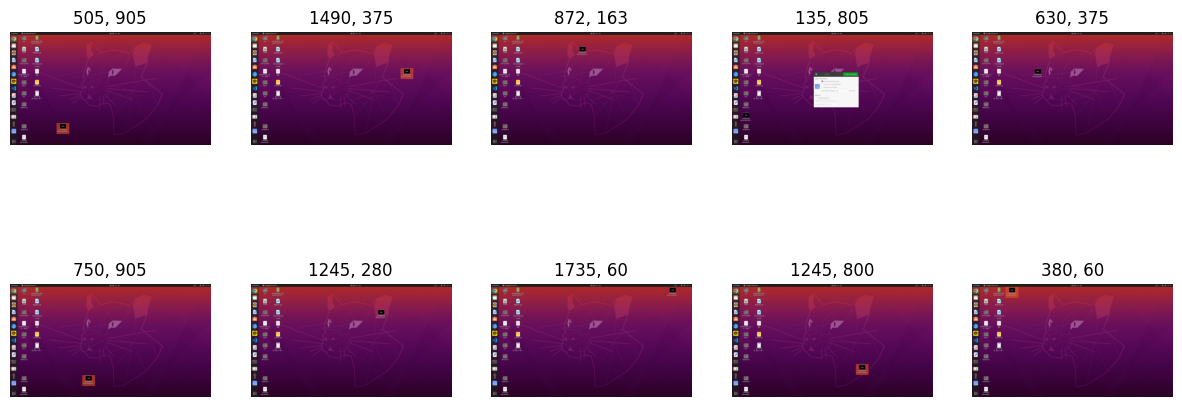

In [5]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
ncols, nrows = 5, 2
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

next_o_pix = [os.path.join(data_dir, fname) for fname in train_dataset[0:10]]

for i, img_path in enumerate(next_o_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    img = mpimg.imread(img_path)
    str_list = img_path.split('/')
    target_list = str_list[8].split('.')
    #print(target_list[0])
    plt.title(target_list[0])
    plt.imshow(img)
    
plt.show()

In [30]:
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()

        self.b1 = nn.Sequential(nn.Conv2d(3, 16, kernel_size=3, padding=1, stride=2),
                                nn.BatchNorm2d(16),
                                nn.ReLU(inplace=True))
        self.b2 = nn.Sequential(nn.Conv2d(16, 64, kernel_size=3, padding=1, stride=2),
                                nn.BatchNorm2d(64),
                                nn.ReLU(inplace=True))
        self.b3 = nn.Sequential(nn.Conv2d(64, 256, kernel_size=3, padding=1, stride=2),
                                nn.BatchNorm2d(256),
                                nn.ReLU(inplace=True))
        self.b4 = nn.Sequential(nn.Conv2d(256, 512, kernel_size=3, padding=1, stride=2),
                                nn.BatchNorm2d(512),
                                nn.ReLU(inplace=True))

        self.avg = nn.AdaptiveAvgPool2d(1)
        self.MLp = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(256, 2),
                                 nn.Sigmoid())

    def forward(self, x):
        b, c, _, _ = x.size()
        out = self.b1(x)
        #print(f'out1 = {out}')
        out = self.b2(out)
        out = self.b3(out)
        out = self.b4(out)
        avg = self.avg(out).view(b, -1)
        out = self.MLp(avg)
        return out

In [31]:
model = Model().cuda()
criterion = nn.MSELoss().cuda()
opt = torch.optim.Adam(model.parameters())

In [25]:
import pyautogui

for i in range(len(os.listdir(data_dir))):
    print(f"{i}번 epcoh")
    target = torch.ones((1, 2), requires_grad=False).cuda()
    # inputs = torch.randn(1, 3, 420, 820).cuda()
    inputs = torch.rand(1, 3, 420, 820).cuda()
    #pyautogui.moveTo(0, 0)  # initialize

    out = model(inputs)
    print(out, target)
    loss = criterion(out, target)

    opt.zero_grad()
    loss.backward()
    opt.step()
    # pyautogui.moveTo(int(out[0][0] * 420), int(out[0][1] * 820))
    print(int(out[0][0] * 420), int(out[0][1] * 820))
    #pyautogui.rightClick(int(out[0][0] * 420), int(out[0][1] * 820))
    #time.sleep(1)

0번 epcoh
out1 = tensor([[[[0.2396, 1.0939, 1.9612,  ..., 0.5225, 1.6740, 0.4933],
          [1.0878, 0.0000, 0.0000,  ..., 0.4469, 0.0000, 0.0000],
          [0.8303, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.4043],
          ...,
          [0.4864, 0.9728, 0.0000,  ..., 1.4777, 0.3441, 1.4922],
          [0.0000, 0.0000, 1.1486,  ..., 0.0000, 0.0000, 0.0000],
          [0.4653, 0.0000, 0.6849,  ..., 0.0000, 0.7038, 0.1859]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2420, 0.0000],
          [1.1726, 0.0000, 0.9840,  ..., 0.0000, 0.0000, 0.0000],
          [1.4376, 0.6182, 0.0761,  ..., 0.0000, 0.2658, 0.0000],
          ...,
          [0.0264, 0.0000, 1.2726,  ..., 1.6778, 0.8848, 0.4141],
          [0.0000, 0.0000, 0.5628,  ..., 0.0000, 0.0486, 0.0000],
          [0.0000, 0.4485, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.7059, 0.8703, 0.5269,  ..., 1.1160, 0.4435, 1.4467],
          [0.0000, 0.0000, 0.8330,  ..., 0.0000, 2.0295, 1.3413],
          [0.0000, 0.0000,

In [33]:
import re

for i in range(len(os.listdir(data_dir))):
    print(f"{i}번째 train")
    img_sample = Image.open(next_o_pix[i]).convert('RGB')
    #plt.imshow(img_sample)
    #img_array = np.array(img_sample)
    #print(img_array)
    
    #이미지를 tensor로 변환
    tf_toTensor = ToTensor() 
    img_tensor_from_PIL = tf_toTensor(img_sample)
    #print(img_tensor_from_PIL)
    newImg = img_tensor_from_PIL.unsqueeze(0)
    #print(img_tensor_from_PIL.size()) # 1 * 3 * 1080 * 1920
    #target = torch.ones((1, 2), requires_grad=False).cuda()
    
    #newImg = torch.Tensor(np.array(img_sample))
    #newImg = newImg.reshape(3, 1080, 1920)
    #print(newImg)
    
    #target을 뽑아내기 위한 문자열 분리
    str_list = next_o_pix[i].split('/')
    target_list = str_list[8].split('.')
    numbers = re.findall(r'\d+', target_list[0])
    #print(numbers, end = '\n\n')
    
    target = torch.tensor([[(float(numbers[0]) / 1920), (float(numbers[1]) / 1080)]], requires_grad = False, dtype = torch.float).cuda()
    #print(f'asdf = {target}')
    
    inputs = newImg.cuda()
    out = model(inputs)
    print(f'out = {out},\ntarget = {target}\n')
    #print(model.weight)
    loss = criterion(out, target)

    opt.zero_grad()
    loss.backward()
    opt.step()
    # pyautogui.moveTo(int(out[0][0] * 420), int(out[0][1] * 820))
    print(int(out[0][0] * 1920), int(out[0][1] * 1080))
    #pyautogui.rightClick(int(out[0][0] * 1080), int(out[0][1] * 1920))
    #time.sleep(1)

0번째 train
out = tensor([[0.4486, 0.4908]], device='cuda:0', grad_fn=<SigmoidBackward0>),
target = tensor([[0.2630, 0.8380]], device='cuda:0')

861 530
1번째 train
out = tensor([[0.4482, 0.4879]], device='cuda:0', grad_fn=<SigmoidBackward0>),
target = tensor([[0.7760, 0.3472]], device='cuda:0')

860 526
2번째 train
out = tensor([[0.4540, 0.4848]], device='cuda:0', grad_fn=<SigmoidBackward0>),
target = tensor([[0.4542, 0.1509]], device='cuda:0')

871 523
3번째 train
out = tensor([[0.4389, 0.4763]], device='cuda:0', grad_fn=<SigmoidBackward0>),
target = tensor([[0.0703, 0.7454]], device='cuda:0')

842 514
4번째 train
out = tensor([[0.4547, 0.4777]], device='cuda:0', grad_fn=<SigmoidBackward0>),
target = tensor([[0.3281, 0.3472]], device='cuda:0')

873 515
5번째 train
out = tensor([[0.4502, 0.4751]], device='cuda:0', grad_fn=<SigmoidBackward0>),
target = tensor([[0.3906, 0.8380]], device='cuda:0')

864 513
6번째 train
out = tensor([[0.4458, 0.4751]], device='cuda:0', grad_fn=<SigmoidBackward0>),
targe

In [40]:
trans = transforms.Compose([transforms.Resize((100,100)), 
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [43]:
trainset = torchvision.datasets.ImageFolder(root = '/home/jnu/Desktop/Reinforce/Royale/screenshot/', transform = trans)

In [39]:
print(next_o_pix[0])

/home/jnu/Desktop/Reinforce/Royale/screenshot/test2/505, 905.png


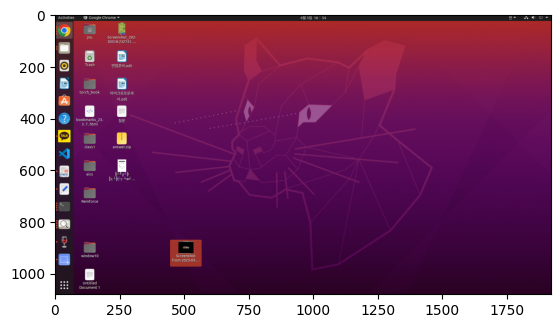

In [111]:
img_RGB = Image.open(next_o_pix[0]).convert('RGB')
plt.imshow(img_RGB)
img_RGB_array = np.array(img_RGB)
#print(img_RGB_array)

In [61]:
print(f'RGB  Image shape : {img_RGB_array.shape}')  # 428 x 428 x 3
print(f'RGB  Value Scale : {img_RGB_array.min()}~{img_RGB_array.max()}') # 0~255

RGB  Image shape : (1080, 1920, 3)
RGB  Value Scale : 0~255


In [65]:
#tf_toTensor = ToTensor() 

img_RGB_tensor_from_PIL = tf_toTensor(img_RGB)
print(img_RGB_tensor_from_PIL)
print(img_RGB_tensor_from_PIL.size()) # 3 x 428 x 428
print(img_RGB_tensor_from_PIL.min(), img_RGB_tensor_from_PIL.max()) # 0~1

tensor([[[0.1137, 0.1137, 0.1137,  ..., 0.1137, 0.1137, 0.1137],
         [0.1137, 0.1137, 0.1137,  ..., 0.1137, 0.1137, 0.1137],
         [0.1137, 0.1137, 0.1137,  ..., 0.1137, 0.1137, 0.1137],
         ...,
         [0.1216, 0.1294, 0.1294,  ..., 0.1686, 0.1686, 0.1686],
         [0.1255, 0.1294, 0.1294,  ..., 0.1686, 0.1686, 0.1686],
         [0.1216, 0.1294, 0.1294,  ..., 0.1686, 0.1686, 0.1686]],

        [[0.1137, 0.1137, 0.1137,  ..., 0.1137, 0.1137, 0.1137],
         [0.1137, 0.1137, 0.1137,  ..., 0.1137, 0.1137, 0.1137],
         [0.1137, 0.1137, 0.1137,  ..., 0.1137, 0.1137, 0.1137],
         ...,
         [0.0784, 0.0824, 0.0824,  ..., 0.0078, 0.0078, 0.0078],
         [0.0784, 0.0824, 0.0824,  ..., 0.0078, 0.0078, 0.0078],
         [0.0784, 0.0824, 0.0824,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.1137, 0.1137, 0.1137,  ..., 0.1137, 0.1137, 0.1137],
         [0.1137, 0.1137, 0.1137,  ..., 0.1137, 0.1137, 0.1137],
         [0.1137, 0.1137, 0.1137,  ..., 0.1137, 0.1137, 0.

In [117]:
newImg = np.array(img_RGB)

print(newImg)


[[[29 29 29]
  [29 29 29]
  [29 29 29]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 [[29 29 29]
  [29 29 29]
  [29 29 29]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 [[29 29 29]
  [29 29 29]
  [29 29 29]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 ...

 [[31 20 29]
  [33 21 31]
  [33 21 31]
  ...
  [43  2 36]
  [43  2 36]
  [43  2 36]]

 [[32 20 30]
  [33 21 31]
  [33 21 31]
  ...
  [43  2 36]
  [43  2 36]
  [43  2 36]]

 [[31 20 29]
  [33 21 31]
  [33 21 31]
  ...
  [43  2 36]
  [43  2 36]
  [43  2 36]]]


In [121]:
print(newImg.shape)
newImg = newImg.reshape(3, 1080, 1920)
print(newImg.shape)


(3, 1080, 1920)
(3, 1080, 1920)


In [93]:
torch.ones((1, 2), requires_grad=False).cuda()

tensor([[1., 1.]], device='cuda:0')

In [97]:
torch.tensor([[1, 3]], requires_grad = False, dtype = torch.float).cuda()

tensor([[1., 3.]], device='cuda:0')